# Module 2 Spatial Operations

In [2]:
%matplotlib inline

import pandas as pd
import geopandas

In [3]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Point

In [7]:
paris = cities.loc[cities['name'] == 'Paris', 'geometry'].squeeze()
brussels = cities.loc[cities['name'] == 'Brussels', 'geometry'].squeeze()

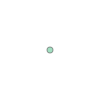

In [8]:
paris

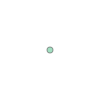

In [9]:
brussels

## Create Line

In [10]:
from shapely.geometry import LineString
line = LineString([paris, brussels])

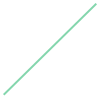

In [11]:
line

## Polygon

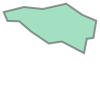

In [6]:
belgium = countries.loc[countries['name'] == 'Belgium', 'geometry'].squeeze()
belgium

## Combining Shapes

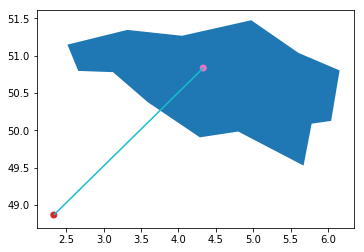

In [21]:
geopandas.GeoSeries([belgium, paris, brussels, line]).plot(cmap='tab10')

## Spatial Relationship

In [22]:
brussels.within(belgium)

True

In [23]:
belgium.contains(brussels)

True

In [24]:
paris.within(belgium)

False

In [25]:
belgium.contains(line)

False

In [26]:
line.intersects(belgium)

True

In [28]:
line.touches(belgium)

False

## Spatial relationships Boolean

In [29]:
countries[countries.contains(paris)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
55,FRA,France,Europe,67106161.0,2699000.0,(POLYGON ((2.513573032246114 51.14850617126189...


## Ex: Spatial Relationship Boolean

In [ ]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

In [ ]:
countries[countries.crosses(amazon)]  # or .intersects

## Set-Operations with Overlay

In [30]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

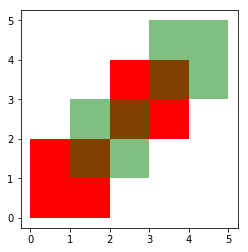

In [31]:
ax = df1.plot(color='red');
df2.plot(ax=ax, color='green', alpha=0.5);

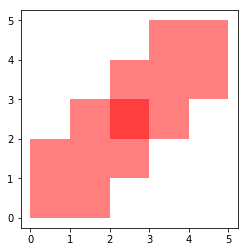

In [58]:
# df3 = geopandas.overlay(df1, df2, how='union')
# df3.plot(color='red',alpha=0.5)
df3= df1.union(df2)
df3.plot(color='red',alpha=0.5)

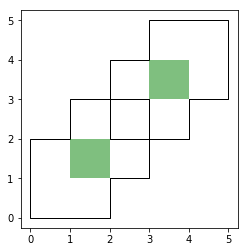

In [59]:
#df4 = geopandas.overlay(df1, df2, how='intersection')

df4= df1.intersection(df2)

ax = df3.plot(facecolor='none', edgecolor='k')
df4.plot(ax=ax, color='green',alpha=0.5)

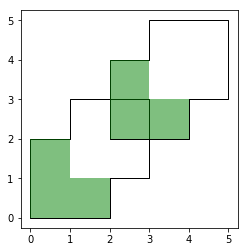

In [60]:
#df5 = geopandas.overlay(df1, df2, how='difference')


df5= df1.difference(df2)

ax = df3.plot(facecolor='none', edgecolor='k')
df5.plot(ax=ax, color='green',alpha=0.5)

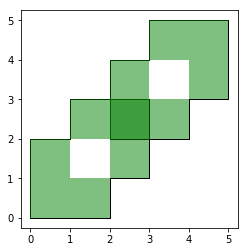

In [61]:
#df6 = geopandas.overlay(df1, df2, how='symmetric_difference')

df6= df1.symmetric_difference(df2)

ax = df3.plot(facecolor='none', edgecolor='k')
df6.plot(ax=ax, color='green',alpha=0.5)

## Ex: Set-Operations with Overlay

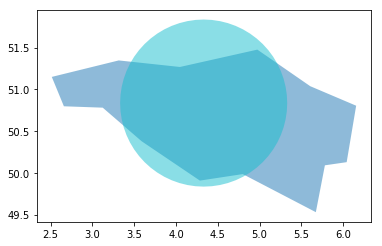

In [52]:
geopandas.GeoSeries([belgium, brussels.buffer(1)]).plot(alpha=0.5, cmap='tab10')

## Ex2: Set-Operations with Overlay

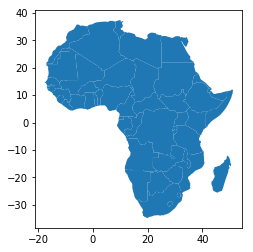

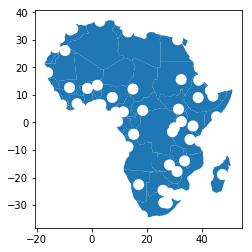

In [101]:
africa = countries[countries['continent'] == 'Africa']

africa.plot()

cities['geometry'] = cities.buffer(2)
geopandas.overlay(africa, cities, how='difference').plot()


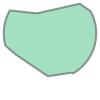

In [62]:
brussels.buffer(1).intersection(belgium)

In [ ]:
brussels.buffer(1).union(belgium)

In [ ]:
brussels.buffer(1).difference(belgium)

In [ ]:
brussels.difference(belgium)

## Unary Union

In [72]:
polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

MULTIPOLYGON (((2 2, 2 0, 0 0, 0 2, 2 2)), ((2 2, 2 4, 4 4, 4 2, 2 2)))


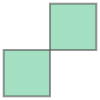

In [90]:
df7=df1.unary_union
print(df7)
df7

## Ex: Unary Union

In [83]:
africa_countries = countries[countries['continent'] == 'Africa']

In [84]:
africa = africa_countries.unary_union

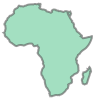

In [85]:
africa

## Recap of Pandas DataFrame Join

In [98]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [99]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Inner and Outer Joins

In [100]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [ ]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

In [ ]:
pd.merge(df_a, df_b, on='subject_id')

In [ ]:
cities2 = cities[cities['name'].isin(['Bern', 'Brussels', 'London', 'Paris'])].copy()
cities2['iso_a3'] = ['CHE', 'BEL', 'GBR', 'FRA']

In [ ]:
cities2

In [ ]:
countries2 = countries[['iso_a3', 'name', 'continent']]
countries2.head()

In [ ]:
cities2.merge(countries2, on='iso_a3')

## Overlay Spatial Operatoins

In [ ]:
africa = countries[countries['continent'] == 'Africa']

In [ ]:
africa.plot()

In [ ]:
cities['geometry'] = cities.buffer(2)

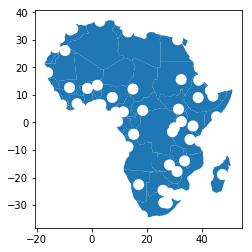

In [56]:
geopandas.overlay(africa, cities, how='difference').plot()

## Spatial Join

In [95]:
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,ITA,Italy,Europe,6.213780e+07,2221000.0
1,San Marino,POINT (12.44177015780014 43.936095834768),79,ITA,Italy,Europe,6.213780e+07,2221000.0
226,Rome,POINT (12.481312562874 41.89790148509894),79,ITA,Italy,Europe,6.213780e+07,2221000.0
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9,AUT,Austria,Europe,8.754413e+06,416600.0
212,Vienna,POINT (16.36469309674374 48.20196113681686),9,AUT,Austria,Europe,8.754413e+06,416600.0
3,Lobamba,POINT (31.19999710971274 -26.46666746135247),152,SWZ,Swaziland,Africa,1.467152e+06,11060.0
16,Mbabane,POINT (31.13333451205636 -26.31665077840921),152,SWZ,Swaziland,Africa,1.467152e+06,11060.0
4,Luxembourg,POINT (6.130002806227083 49.61166037912108),97,LUX,Luxembourg,Europe,5.941300e+05,58740.0
9,Bir Lehlou,POINT (-9.652522218250112 26.11916668599338),137,SAH,W. Sahara,Africa,6.032530e+05,906.5
10,Monaco,POINT (7.406913173465057 43.73964568785249),55,FRA,France,Europe,6.710616e+07,2699000.0


In [96]:
cities_within_country = geopandas.sjoin(cities, countries, how='left',op='within')

In [97]:
cities_within_country

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
1,San Marino,POINT (12.44177015780014 43.936095834768),79.0,ITA,Italy,Europe,6.213780e+07,2221000.0
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9.0,AUT,Austria,Europe,8.754413e+06,416600.0
3,Lobamba,POINT (31.19999710971274 -26.46666746135247),152.0,SWZ,Swaziland,Africa,1.467152e+06,11060.0
4,Luxembourg,POINT (6.130002806227083 49.61166037912108),97.0,LUX,Luxembourg,Europe,5.941300e+05,58740.0
5,Palikir,POINT (158.1499743237623 6.916643696007725),NaN,NaN,NaN,NaN,NaN,NaN
6,Majuro,POINT (171.3800001757465 7.103004311216239),NaN,NaN,NaN,NaN,NaN,NaN
7,Funafuti,POINT (179.2166470940289 -8.516651999041073),NaN,NaN,NaN,NaN,NaN,NaN
8,Melekeok,POINT (134.6265484669922 7.487396172977981),NaN,NaN,NaN,NaN,NaN,NaN
9,Bir Lehlou,POINT (-9.652522218250112 26.11916668599338),137.0,SAH,W. Sahara,Africa,6.032530e+05,906.5


In [ ]:
joined['continent'].value_counts()